In [2]:
library(tidyverse) # data manipulation
library(igraph)
library(arules) # mining association rules and frequent itemsets
library(arulesViz) # visualization techniques for association rules
library(knitr) # dynamic report generation
library(gridExtra) # provides a number of user-level functions to work with "grid" graphics
library(RColorBrewer)
library(ggplot2)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

载入程辑包：‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


载入需要的程辑包：Matrix


载入程辑包：‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



载入程辑包：‘arules’


T

### 抽象产品ARM

In [19]:
trans = read.transactions("transaction_extend.csv", format="single", cols=c(10,9), sep=",",skip=1)
summary(trans)
#glimpse(trans)
#str(trans)
#itemFrequencyPlot(trans, topN=15, type="absolute", col="wheat2",xlab="Item name", ylab="Frequency", main="Absolute Item Frequency Plot")

transactions as itemMatrix in sparse format with
 3672 rows (elements/itemsets/transactions) and
 15 columns (items) and a density of 0.07835875 

most frequent items:
   best-seller;middle-end       best-seller;low-end       well-seller;low-end 
                      721                       680                       471 
  dull-product;middle-end normal-product;middle-end                   (Other) 
                      456                       441                      1547 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6 
3153  425   70   19    3    2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.175   1.000   6.000 

includes extended item information - examples:
                  labels
1   best-seller;high-end
2    best-seller;low-end
3 best-seller;middle-end

includes extended transaction information - examples:
  transactionID
1        1-1045
2        1-1047
3        1-1054

In [59]:
supportLevels <- c(0.05, 0.01, 0.005, 0.0025)
confidenceLevels <- c(0.5,0.45,0.4, 0.35,0.3, 0.25,0.2,0.15, 0.10,0.05)
rules_sup0.25 <- integer(length=length(confidenceLevels))
rules_sup5 <- integer(length=length(confidenceLevels))
rules_sup1 <- integer(length=length(confidenceLevels))
rules_sup0.5 <- integer(length=length(confidenceLevels))

# Apriori algorithm with a support level of 10%
for (i in 1:length(confidenceLevels)) {
  rules_sup5[i] <- length(apriori(trans, parameter=list(sup=supportLevels[1], 
                                                        conf=confidenceLevels[i], target="rules")))
}

# Apriori algorithm with a support level of 5%
for (i in 1:length(confidenceLevels)){
  rules_sup1[i] <- length(apriori(trans, parameter=list(sup=supportLevels[2], 
                                                        conf=confidenceLevels[i], target="rules")))
}

# Apriori algorithm with a support level of 1%
for (i in 1:length(confidenceLevels)){
  rules_sup0.5[i] <- length(apriori(trans, parameter=list(sup=supportLevels[3], 
                                                          conf=confidenceLevels[i], target="rules")))
}

# Apriori algorithm with a support level of 0.5%
for (i in 1:length(confidenceLevels)){
  rules_sup0.25[i] <- length(apriori(trans, parameter=list(sup=supportLevels[4], 
                                                           conf=confidenceLevels[i], target="rules")))
}


# Number of rules found with a support level of 5%
plot1 <- qplot(confidenceLevels, rules_sup5, geom=c("point", "line"), 
               xlab="Confidence level", ylab="Number of rules found", color=I('darkblue'),
               main="Apriori with a support level of 5%") + 
  scale_y_continuous(breaks=seq(0, 10, 2)) +
  theme_bw()

# Number of rules found with a support level of 1%
plot2 <- qplot(confidenceLevels, rules_sup1, geom=c("point", "line"), 
               xlab="Confidence level", ylab="Number of rules found", color=I('darkblue'),
               main="Apriori with a support level of 1%") + 
  scale_y_continuous(breaks=seq(0, 50, 10)) +
  theme_bw()

# Number of rules found with a support level of 0.5%
plot3 <- qplot(confidenceLevels, rules_sup0.5, geom=c("point", "line"), 
               xlab="Confidence level", ylab="Number of rules found", color=I('darkblue'),
               main="Apriori with a support level of 0.5%") + 
  scale_y_continuous(breaks=seq(0, 220, 50)) +
  theme_bw()

# Number of rules found with a support level of 0.25%
plot4 <- qplot(confidenceLevels, rules_sup0.25, geom=c("point", "line"), 
               xlab="Confidence level", ylab="Number of rules found", color=I('darkblue'),
               main="Apriori with a support level of 0.25%") + 
  # scale_y_continuous(breaks=seq(0, 800, 50)) +
  theme_bw()

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.05      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[53 item(s), 310 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.45    0.1    1 none FALSE            TRUE       5    0.05      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.075      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 23 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[53 item(s), 310 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.45    0.1    1 none FALSE            TRUE       5   0.075      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 

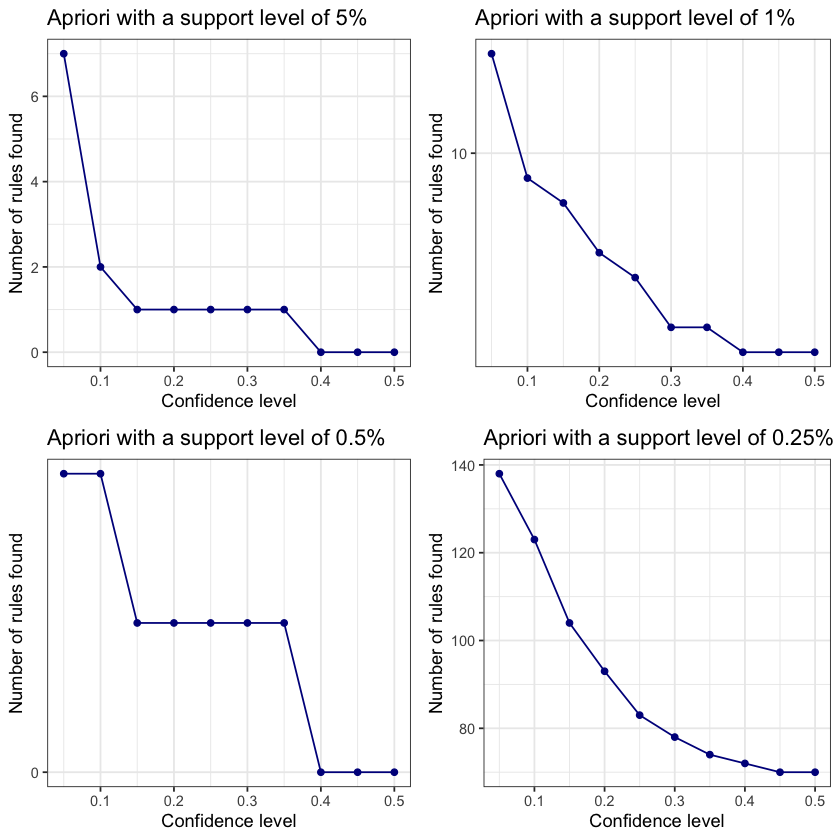

In [60]:
apr=grid.arrange(plot1, plot2, plot3, plot4, ncol=2)

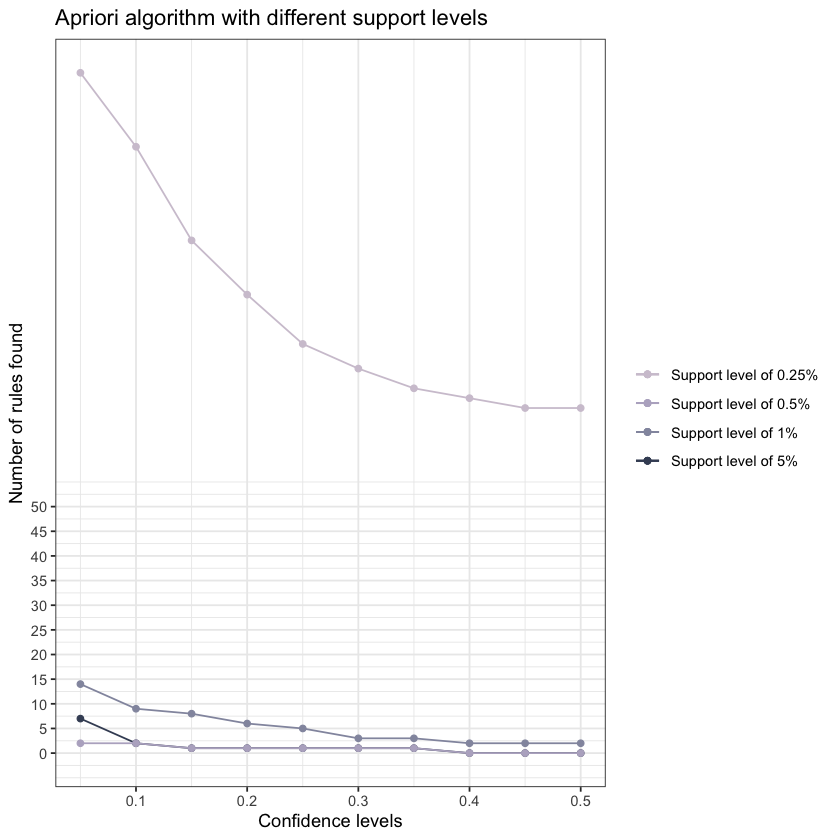

In [61]:
num_rules <- data.frame(rules_sup5, rules_sup1, rules_sup0.5, rules_sup0.25, confidenceLevels)

# Number of rules found with a support level of 5%, 1% ， 0.5%，0.25%
com=ggplot(data=num_rules, aes(x=confidenceLevels)) +
  # Plot line and points (support level of 5%)
  geom_line(aes(y=rules_sup5, colour="Support level of 5%")) +
  geom_point(aes(y=rules_sup5, colour="Support level of 5%")) +
  # Plot line and points (support level of 1%)
  geom_line(aes(y=rules_sup1, colour="Support level of 1%")) + 
  geom_point(aes(y=rules_sup1, colour="Support level of 1%")) +
  # Plot line and points (support level of 0.5%)
  geom_line(aes(y=rules_sup0.5, colour="Support level of 0.5%")) +
  geom_point(aes(y=rules_sup0.5, colour="Support level of 0.5%")) +
  # Plot line and points (support level of 0.25%)
  geom_line(aes(y=rules_sup0.25, colour="Support level of 0.25%")) +
  geom_point(aes(y=rules_sup0.25, colour="Support level of 0.25%")) +
  scale_y_continuous(breaks=seq(0, 50, 5)) +
  # Labs and theme
  labs(x="Confidence levels", y="Number of rules found", 
       title="Apriori algorithm with different support levels") +
  theme_bw() +
  scale_color_manual(values=c('#d1c6d4',"#b8b1c9",'#9397ad','#414d64'))+
  theme(legend.title=element_blank())

com

In [33]:
rules <- apriori(trans, parameter=list(minlen=2,sup=0.005,conf=0.15, target="rules"))
ordered_rules <- sort(rules, by = "lift")
inspect(ordered_rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.15    0.1    1 none FALSE            TRUE       5   0.005      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 18 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[15 item(s), 3672 transaction(s)] done [0.00s].
sorting and recoding items ... [12 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [7 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                          rhs                          support confidence    coverage      lift count
[1] {well-seller;high-end}    => {best-seller;high-end}   0.005991285  0.3548387 0.016884532 4.7727756    22
[2] {best-seller;low-end,                                                

In [20]:
sort.rules <- sort(rules, by="support")

subset.matrix <- is.subset(x=sort.rules, y=sort.rules)

subset.matrix <- as.matrix(is.subset(x=sort.rules, y=sort.rules))

#subset.matrix

# 把這個矩陣的下三角去除，只留上三角的資訊
subset.matrix[lower.tri(subset.matrix, diag=T)] <- NA

# 計算每個column中TRUE的個數，若有一個以上的TRUE，代表此column是多餘的
redundant <- colSums(subset.matrix, na.rm=T) >= 1

# 移除多餘的規則
sort.rules <- sort.rules[!redundant]

inspect(sort.rules)

    lhs                         rhs                      support     confidence
[1] {well-seller;low-end}    => {best-seller;low-end}    0.032126327 0.2505308 
[2] {well-seller;middle-end} => {best-seller;middle-end} 0.014429622 0.1531792 
[3] {well-seller;high-end}   => {best-seller;high-end}   0.005989654 0.3548387 
    coverage   lift      count
[1] 0.12823305 1.3532347 118  
[2] 0.09420093 0.7803428  53  
[3] 0.01687993 4.7740754  22  


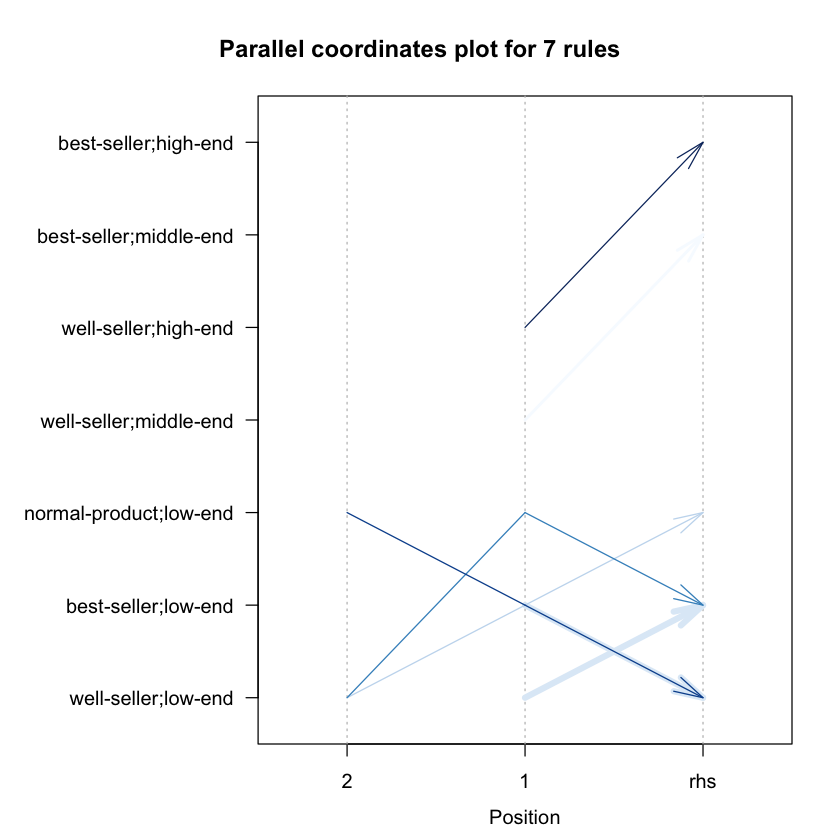

In [30]:
plot(ordered_rules, method="paracoord", control=list(reorder=TRUE,col = rev(brewer.pal(9, 'Blues'))))

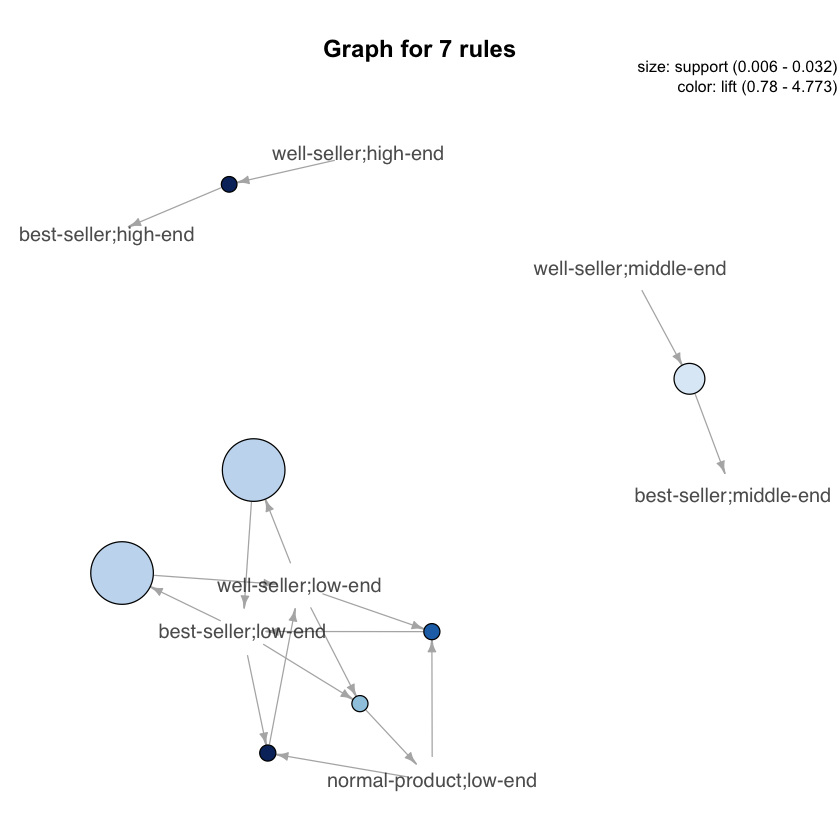

In [47]:
plot(rules, method = "graph", engine = "igraph",
     #control=list(col = rev(brewer.pal(9, 'Blues'))))
    nodeCol = rev(brewer.pal(9, 'Blues')), edgeCol = grey(.7), alpha = 1)

### seller 2378的ARM

In [88]:
trans = read.transactions("seller2378.csv", format="single", cols=c(10,4), sep=",",skip=1)
summary(trans)
#glimpse(trans)
#str(trans)
#itemFrequencyPlot(trans, topN=15, type="absolute", col="wheat2",xlab="Item name", ylab="Frequency", main="Absolute Item Frequency Plot")

transactions as itemMatrix in sparse format with
 310 rows (elements/itemsets/transactions) and
 53 columns (items) and a density of 0.02568472 

most frequent items:
   1924    1459     748    2050    1335 (Other) 
    122      37      23      19      17     204 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   8  10 
236  58   7   5   1   1   1   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.361   1.000  10.000 

includes extended item information - examples:
  labels
1   1003
2   1024
3   1034

includes extended transaction information - examples:
  transactionID
1     2378-1004
2     2378-1009
3     2378-1035

In [76]:
supportLevels <- c(0.01, 0.0075,0.005)
confidenceLevels <- c(0.5,0.45,0.4, 0.35,0.3, 0.25,0.2,0.15, 0.10,0.05)
rules_sup5 <- integer(length=length(confidenceLevels))
rules_sup1 <- integer(length=length(confidenceLevels))
rules_sup0.5 <- integer(length=length(confidenceLevels))

for (i in 1:length(confidenceLevels)) {
  rules_sup5[i] <- length(apriori(trans, parameter=list(sup=supportLevels[1], 
                                                        conf=confidenceLevels[i], target="rules")))
}

for (i in 1:length(confidenceLevels)){
  rules_sup1[i] <- length(apriori(trans, parameter=list(sup=supportLevels[2], 
                                                        conf=confidenceLevels[i], target="rules")))
}

for (i in 1:length(confidenceLevels)){
  rules_sup0.5[i] <- length(apriori(trans, parameter=list(sup=supportLevels[3], 
                                                          conf=confidenceLevels[i], target="rules")))
}

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[53 item(s), 310 transaction(s)] done [0.00s].
sorting and recoding items ... [25 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.45    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[53 item(s), 310 transaction(s)] done [0.00s].
sorting and recoding items ... [32 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.45    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
 

In [62]:
plot1 <- qplot(confidenceLevels, rules_sup5, geom=c("point", "line"), 
               xlab="Confidence level", ylab="Number of rules found", color=I('darkblue'),
               main="Apriori with a support level of 5%") + 
  scale_y_continuous(breaks=seq(0, 10, 2)) +
  theme_bw()


plot2 <- qplot(confidenceLevels, rules_sup1, geom=c("point", "line"), 
               xlab="Confidence level", ylab="Number of rules found", color=I('darkblue'),
               main="Apriori with a support level of 1%") + 
  scale_y_continuous(breaks=seq(0, 50, 10)) +
  theme_bw()


plot3 <- qplot(confidenceLevels, rules_sup0.5, geom=c("point", "line"), 
               xlab="Confidence level", ylab="Number of rules found", color=I('darkblue'),
               main="Apriori with a support level of 0.5%") + 
  scale_y_continuous(breaks=seq(0, 220, 50)) +
  theme_bw()

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.05      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[53 item(s), 310 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.45    0.1    1 none FALSE            TRUE       5    0.05      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[53 item(s), 310 transaction(s)] done [0.00s].
sorting and recoding items ... [32 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.45    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
 

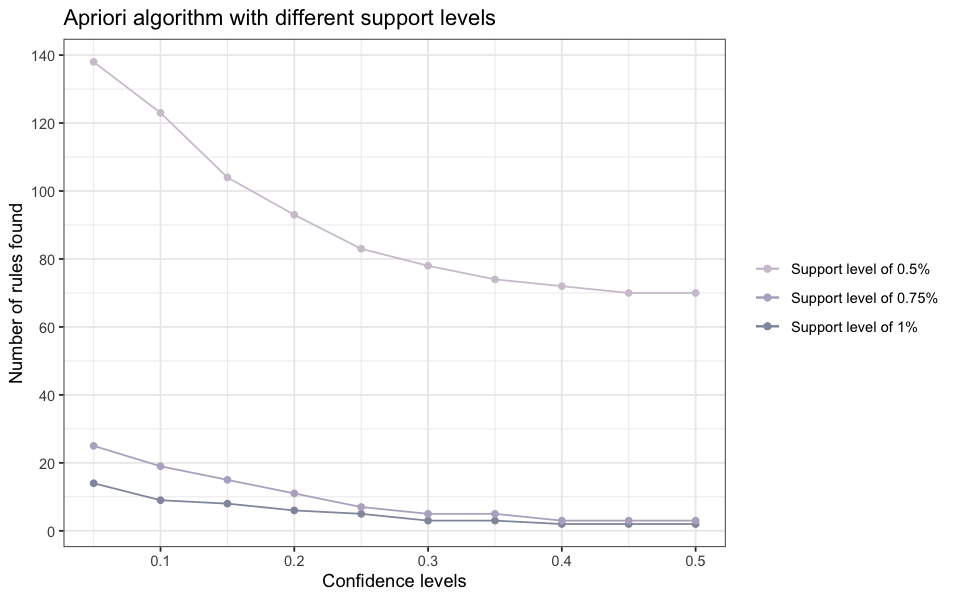

In [90]:
num_rules <- data.frame(rules_sup5, rules_sup1, rules_sup0.5,confidenceLevels)

# Number of rules found with a support level of 5%, 1% ， 0.5%，0.25%

options(repr.plot.width = 8, repr.plot.height =5)
ggplot(data=num_rules, aes(x=confidenceLevels)) +
  # Plot line and points (support level of 5%)
  geom_line(aes(y=rules_sup5, colour="Support level of 1%")) +
  geom_point(aes(y=rules_sup5, colour="Support level of 1%")) +
  # Plot line and points (support level of 1%)
  geom_line(aes(y=rules_sup1, colour="Support level of 0.75%")) + 
  geom_point(aes(y=rules_sup1, colour="Support level of 0.75%")) +
  # Plot line and points (support level of 0.5%)
  geom_line(aes(y=rules_sup0.5, colour="Support level of 0.5%")) +
  geom_point(aes(y=rules_sup0.5, colour="Support level of 0.5%")) +
  # Plot line and points (support level of 0.25%)
  scale_y_continuous(breaks=seq(0, 150, 20)) +
  # Labs and theme
  labs(x="Confidence levels", y="Number of rules found", 
       title="Apriori algorithm with different support levels") +
  theme_bw() +
  scale_color_manual(values=c('#d1c6d4',"#b8b1c9",'#9397ad','#414d64'))+
  theme(legend.title=element_blank())


In [92]:
rules <- apriori(trans, parameter=list(minlen=2,sup=0.0075,conf=0.2, target="rules"))
ordered_rules <- sort(rules, by = "lift")
inspect(ordered_rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5  0.0075      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[53 item(s), 310 transaction(s)] done [0.00s].
sorting and recoding items ... [28 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [10 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs       rhs    support     confidence coverage   lift      count
[1]  {2069} => {748}  0.009677419 0.2307692  0.04193548 3.1103679 3    
[2]  {1301} => {748}  0.009677419 0.2307692  0.04193548 3.1103679 3    
[3]  {2050} => {748}  0.012903226 0.2105263  0.06129032 2.8375286 4    
[4] 

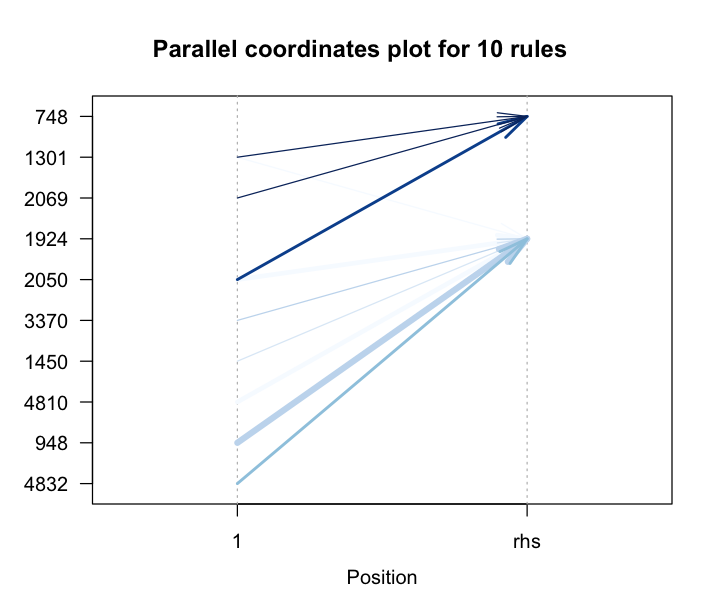

In [103]:
options(repr.plot.width = 6, repr.plot.height =5)
plot(ordered_rules, method="paracoord",control=list(reorder=TRUE,col = rev(brewer.pal(9, 'Blues'))))

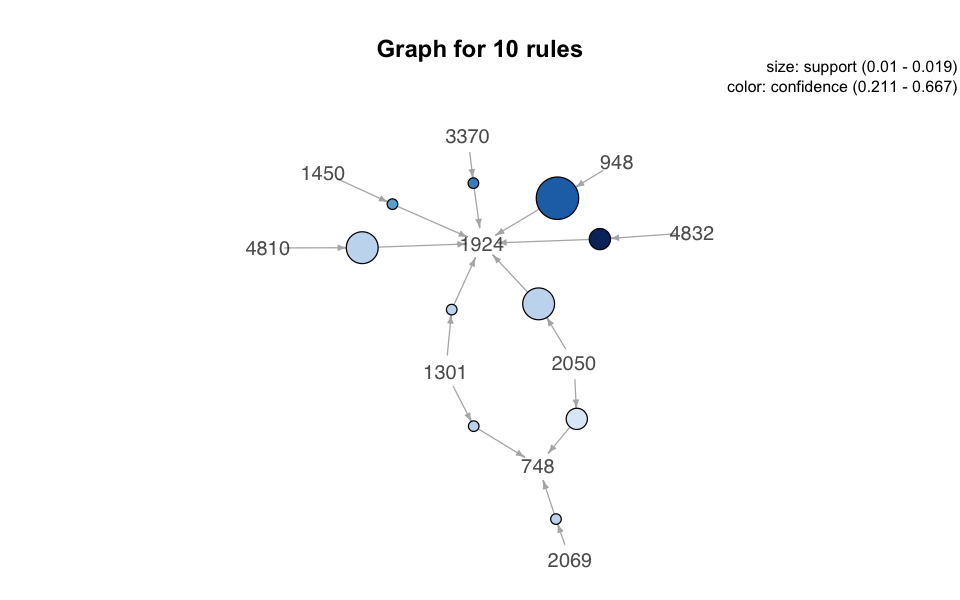

In [98]:
options(repr.plot.width = 8, repr.plot.height =5)
plot(rules, method = "graph", engine = "igraph",shading='confidence',
     #control=list(col = rev(brewer.pal(9, 'Blues'))))
    nodeCol = rev(brewer.pal(9, 'Blues')), edgeCol = grey(.7), alpha = 1)